In [29]:
import pandas as pd 
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
data=pd.read_csv('C:/Users/ediso/Desktop/Machine Learning/Sesion 6/Casos Prácticos/Bases de datos/BigMartSales.csv')


### Problema

* <b>Idem_Identifier</b>
* <b>Idem_Weight</b>
* <b>Item_Fat_Content</b>
* <b>Item_Visibility</b>
* <b>Item_Type</b>
* <b>Item_MRP</b>
* <b>Outlet_ID</b>
* <b>Outlet_Year</b>
* <b>Outlet_Size</b>
* <b>Outlet_Location_Type</b>
* <b>Outlet_Type</b>
* <b>Item_Outlet_Sales</b>



In [31]:
data.rename(columns={'Outlet_Identifier':'Outlet_ID','Outlet_Establishment_Year':'Outlet_Year','Outlet_Location_Type':'Location_Type'},inplace=True)

In [32]:
data.drop(columns=['Item_Identifier','Outlet_Year'],axis=1,inplace=True)

In [33]:
print(data.info(),data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        7060 non-null   float64
 1   Item_Fat_Content   8523 non-null   object 
 2   Item_Visibility    8523 non-null   float64
 3   Item_Type          8523 non-null   object 
 4   Item_MRP           8523 non-null   float64
 5   Outlet_ID          8523 non-null   object 
 6   Outlet_Size        6113 non-null   object 
 7   Location_Type      8523 non-null   object 
 8   Outlet_Type        8523 non-null   object 
 9   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 666.0+ KB
None (8523, 10)


In [34]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_ID', 'Outlet_Size', 'Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

### Variable Objetivo

In [35]:
target=data[['Item_Outlet_Sales']]

In [36]:
list_cuanti=list(data.describe().columns)
list_cuanti
len(list_cuanti)

4

In [37]:
list_cuali=data.drop(columns=list_cuanti).columns
list_cuali
len(list_cuali)

6

### Nulos

In [66]:
import random as r

# Obtén una lista de valores únicos en la columna categórica
valores_unicos = data['Outlet_Size'].unique()

# Supongamos que quieres imputar aleatoriamente los valores nulos
data['Outlet_Size'].fillna(r.choice(valores_unicos), inplace=True)

In [67]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_data.head(15)


,Total,Percent
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_ID,0,0.0
Outlet_Size,0,0.0
Location_Type,0,0.0
Outlet_Type,0,0.0
Item_Outlet_Sales,0,0.0


In [60]:
null=['Item_Weight','Outlet_Size']
for i in null:
    display(i,data[i].isnull().value_counts(normalize=True))    

'Item_Weight'

False    1.0
Name: Item_Weight, dtype: float64

'Outlet_Size'

False    1.0
Name: Outlet_Size, dtype: float64

In [41]:
data['Item_Weight'].fillna(data.Item_Weight.mean(),inplace=True)

In [42]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode().iloc[0],inplace=True)

In [55]:
b=data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].count()
data[['Item_Fat_Content']]
mapeo = {'reg': 'Regular','LF': 'Low Fat','low fat': 'Low Fat'}
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(mapeo).fillna(data['Item_Fat_Content'])
a=data.groupby('Item_Fat_Content').size()
c=data.groupby('Outlet_ID').size()
print(f'Tabla de datos de indice de grasa:{a}\n Tabla de datos de tamano de tienda:{b}\n Tabla de tienda unica de departamenteo:{c}')


Tabla de datos de indice de grasa:Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64
 Tabla de datos de tamano de tienda:Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Outlet_Sales, dtype: int64
 Tabla de tienda unica de departamenteo:Outlet_ID
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64


### Graficos

In [ ]:
data['Item_Outlet_Sales'].plot(kind='hist',density=True,edgecolor='k')

## Histograma cuantitativas

In [ ]:
for var in list_cuanti:
    sns.histplot(data[var])
    plt.show()

### Box Cuantitativas

In [ ]:
for var in list_cuanti:
    data[var].plot(kind='box',title=var)
    
    plt.show()

### Cualitativas

In [ ]:
'''for var in list_cuali:
    data.groupby(var)['Item_Outlet_Sales'].count().plot.bar()
    plt.title(var)
    plt.show()'''

In [ ]:

# Supongamos que tienes una lista de variables categóricas llamada list_cuali
for var in list_cuali:
    plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
    sns.countplot(data=data, x=var)  # Utiliza seaborn para un gráfico de recuento más agradable
    plt.title(f'Conteo de valores para {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x para que sean legibles si es necesario

    plt.show()


In [ ]:
#data.dropna(how='any',inplace=True)

In [64]:
data[null].isnull().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

In [ ]:
for var in list_cuanti:
    # Calcular la correlación entre 'Item_Outlet_Sales' y la columna actual
    correlation = data['Item_Outlet_Sales'].corr(data[var])
    print(f"Correlación entre Item_Outlet_Sales y '{var}': {correlation}")

    # Crear un DataFrame temporal con las dos columnas para graficar
    df = pd.concat([data['Item_Outlet_Sales'], data[var]], axis=1)

    # Graficar la dispersión (scatter plot)
    df.plot.scatter(x=var, y='Item_Outlet_Sales', alpha=0.5)
    plt.title(f'Scatter plot entre "Item_Outlet_Sales" y "{var}" (Correlación: {correlation:.2f})')
    plt.xlabel(var)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

### Correlacion

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


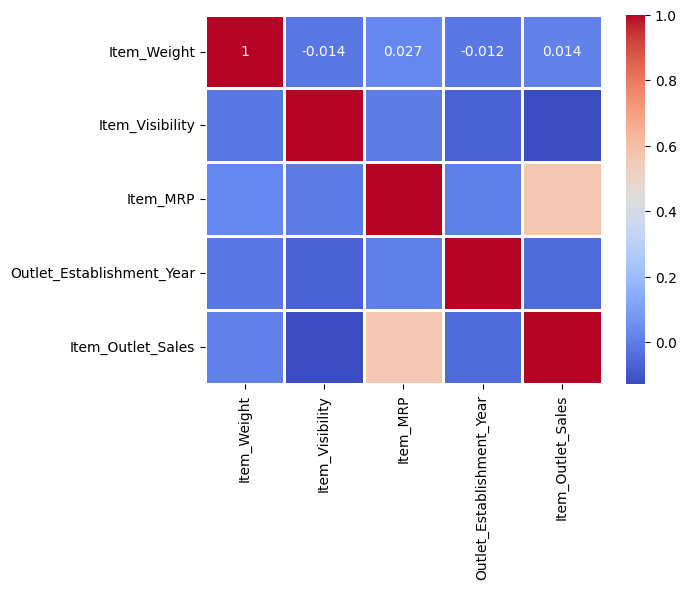

In [ ]:
cor=data[list_cuanti].corr()
print(cor)
sns.heatmap(cor,annot=True,robust=True,linewidths=2,cmap='coolwarm' )
plt.show()

C:\Users\ediso\AppData\Local\Temp\ipykernel_23548\503931602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=data.corr()


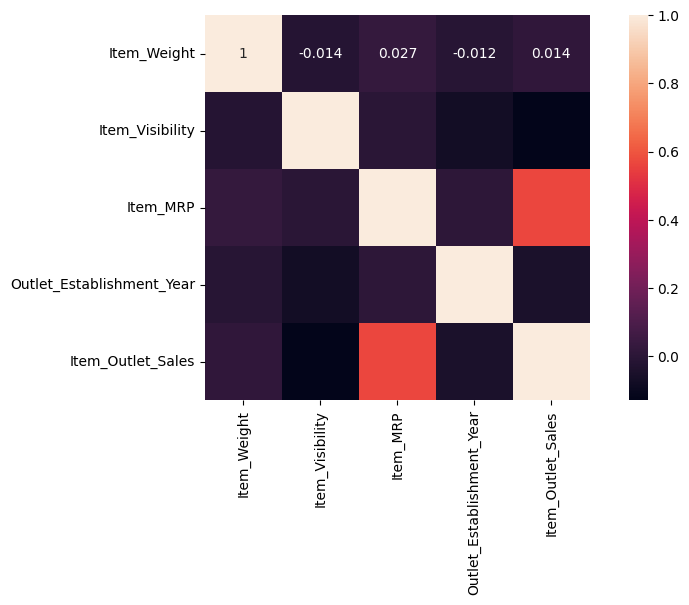

In [ ]:
c=data.corr()
f , ax =plt.subplots(figsize=(10,5))
sns.heatmap(c,square=True,annot=c)
plt.show()

In [ ]:
c[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales',ascending=True).style.background_gradient()

,Item_Outlet_Sales
Item_Visibility,-0.128625
Outlet_Establishment_Year,-0.049135
Item_Weight,0.014123
Item_MRP,0.567574
Item_Outlet_Sales,1.000000


In [ ]:
list_cuali

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

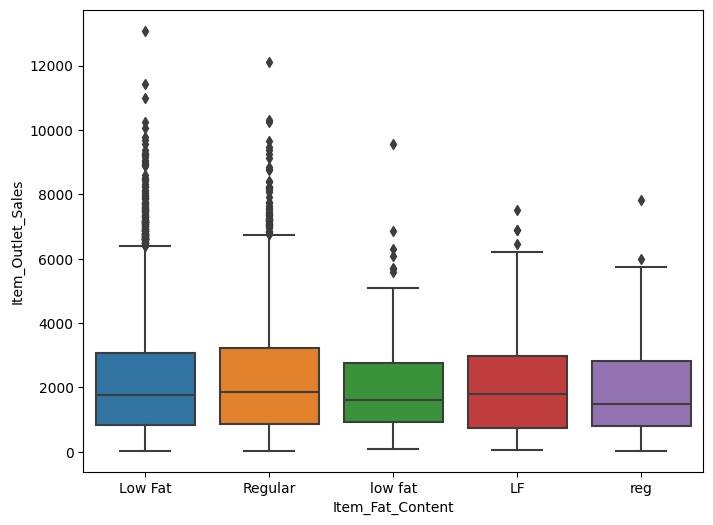

In [ ]:
var = 'Item_Fat_Content'
dt = pd.concat([data['Item_Outlet_Sales'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()

In [ ]:
var='Item_Type'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()           

In [ ]:
var='Outlet_Identifier'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()    

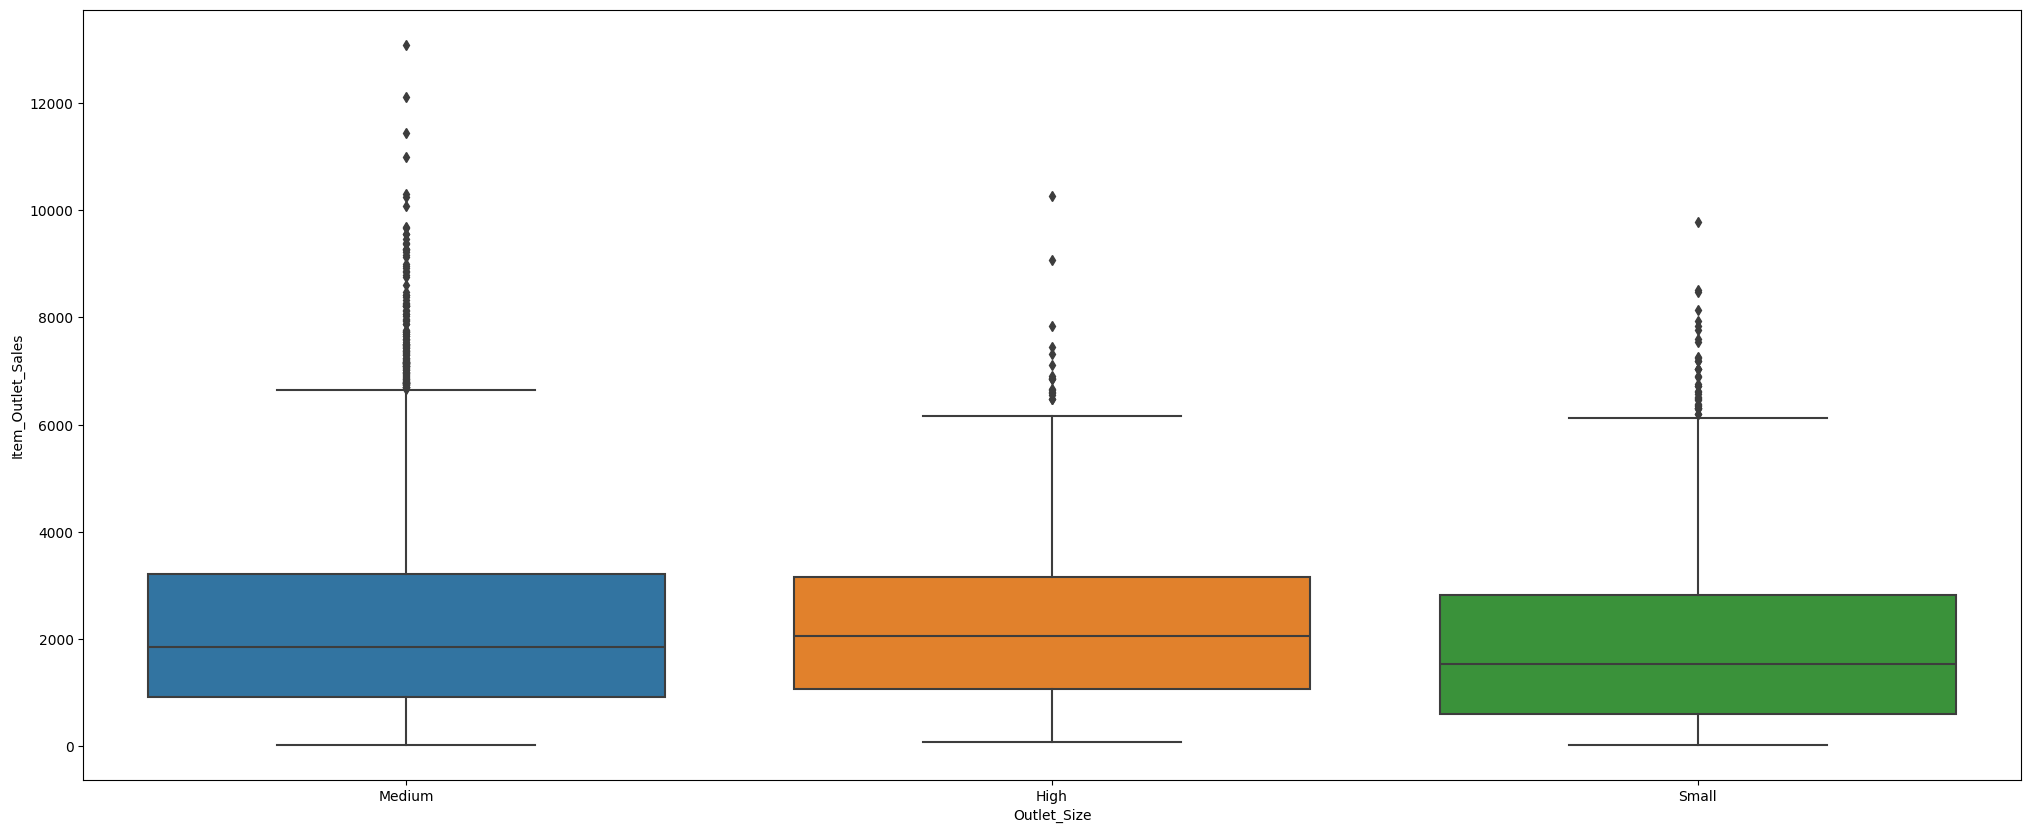

In [ ]:
var='Outlet_Size'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()    

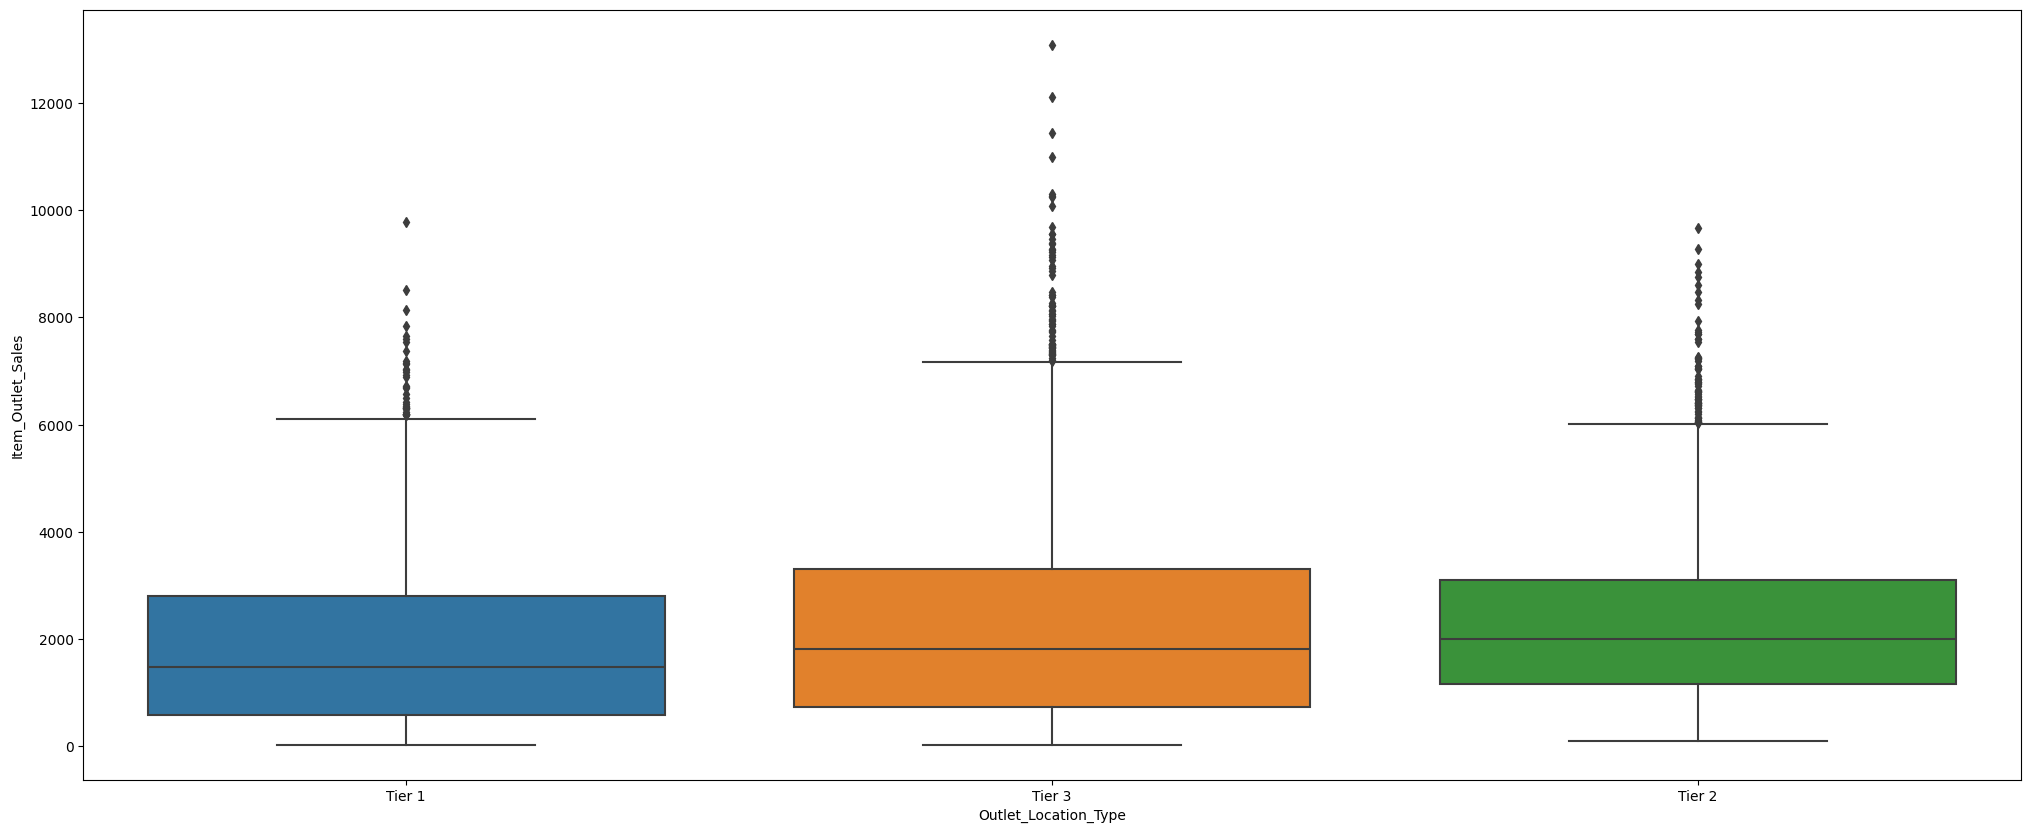

In [ ]:
var='Location_Type'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()    

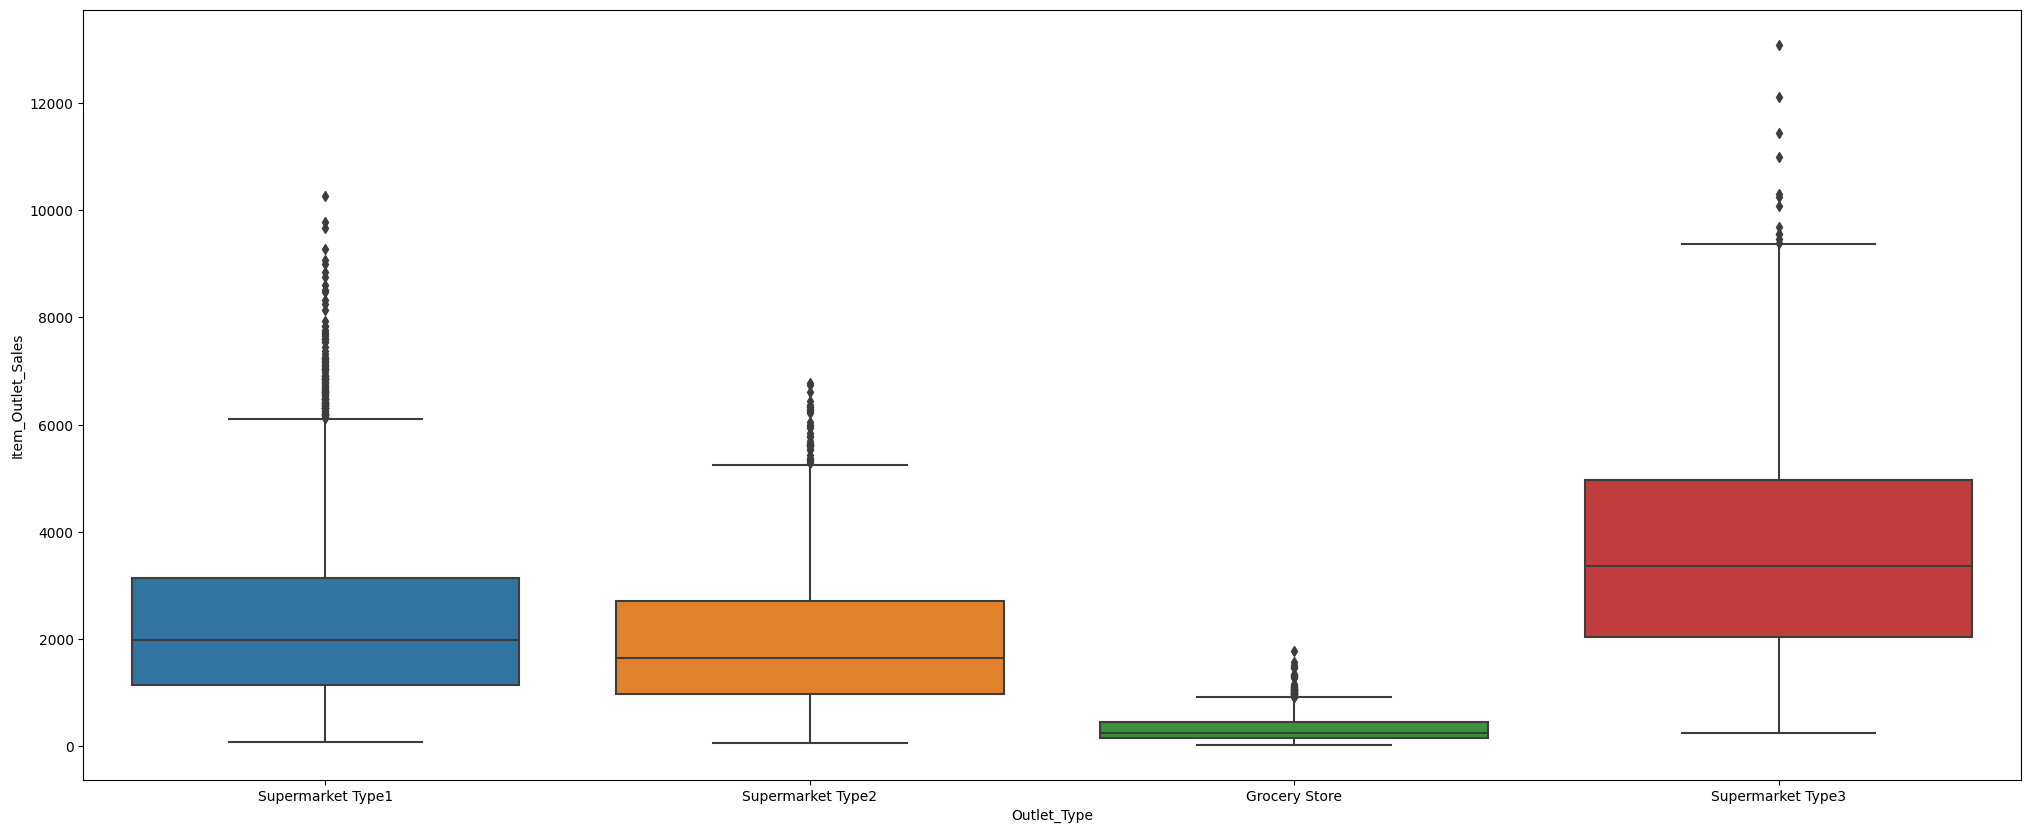

In [ ]:
var='Outlet_Type'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()    

### box plot Cuanti

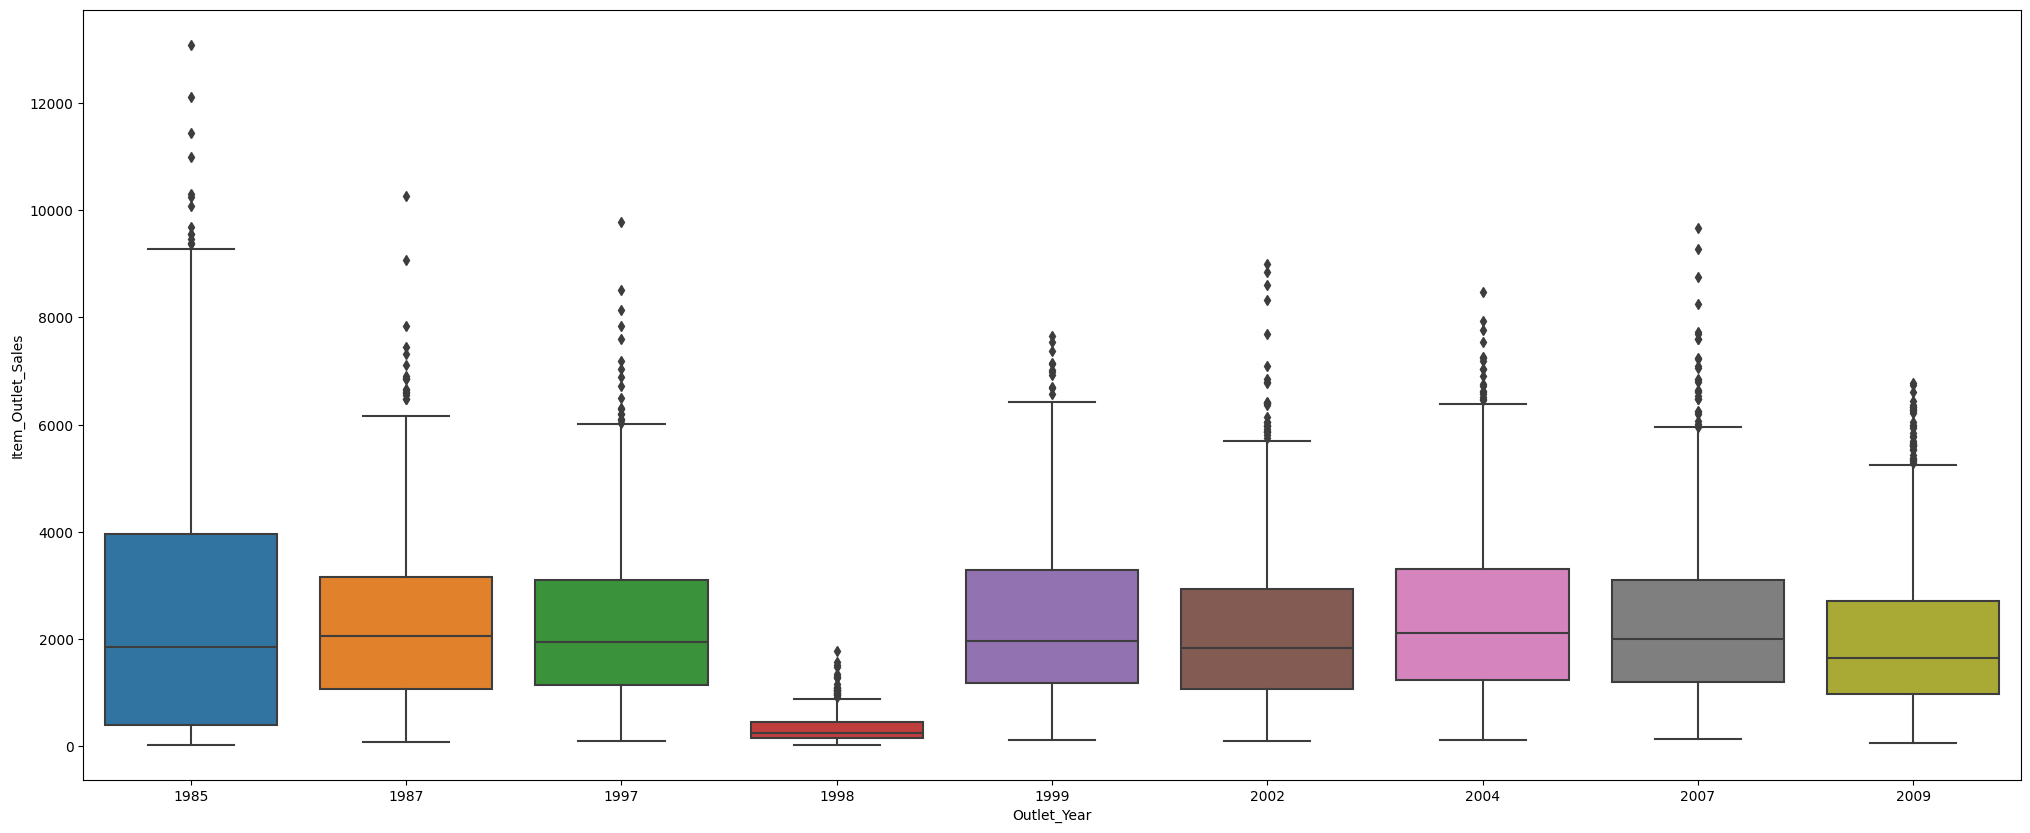

In [73]:
var='Outlet_Year'
dt=pd.concat([target,data[var]],axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=dt)
plt.show()    

#### Faltan 4 cuantitativas

In [ ]:
var=['Item_Weight','Item_Visibility','Item_MRP']
for i in var:
    dt=pd.concat([target,data[i]],axis=1)
    f, ax = plt.subplots(figsize=(25, 10))
    fig = sns.displot(x=i, y="Item_Outlet_Sales", data=dt)
    plt.show()    

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        8523 non-null   float64
 1   Item_Fat_Content   8523 non-null   object 
 2   Item_Visibility    8523 non-null   float64
 3   Item_Type          8523 non-null   object 
 4   Item_MRP           8523 non-null   float64
 5   Outlet_ID          8523 non-null   object 
 6   Outlet_Size        8523 non-null   object 
 7   Location_Type      8523 non-null   object 
 8   Outlet_Type        8523 non-null   object 
 9   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 666.0+ KB


In [ ]:
data.describe(include=object)


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,2793,3350,5577


In [ ]:
data.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [ ]:
data.groupby('Item_Type')['Item_Identifier'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Identifier, dtype: int64

In [ ]:

data.corr()
sns.pairplot(data)
plt.show()

C:\Users\ediso\AppData\Local\Temp\ipykernel_18648\287744348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


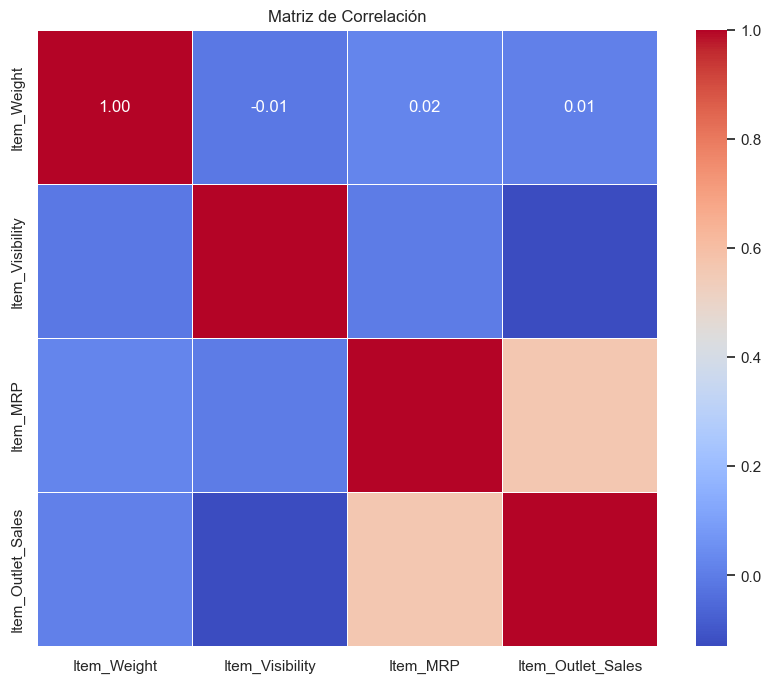

c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

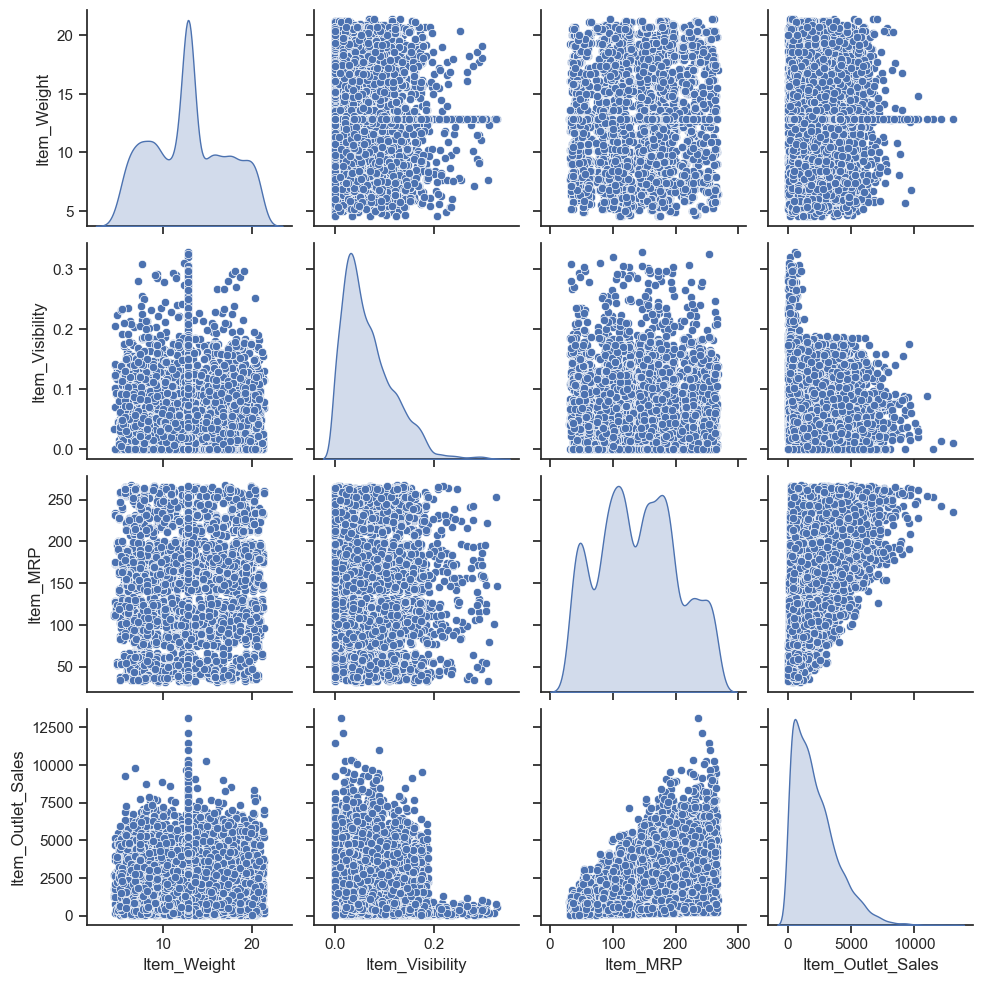

In [91]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Personalizar el estilo de seaborn
sns.set(style="whitegrid")  # Establece un estilo de fondo blanco con líneas de cuadrícula

# Crear una figura de tamaño personalizado
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

# Ahora, crea un pairplot para visualizar la relación entre las variables
sns.set(style="ticks")  # Cambia el estilo a "ticks" para pairplot

# Personaliza aún más el estilo de los gráficos si lo deseas
sns.pairplot(data, diag_kind='kde', markers='o', palette='husl')

# Mostrar el pairplot
plt.show()

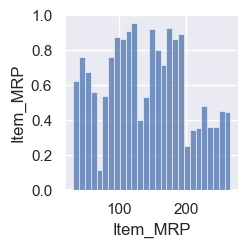

In [ ]:
sns.set()
cols=['Item_MRP']
sns.pairplot(data[cols],height=2.5)
plt.show()

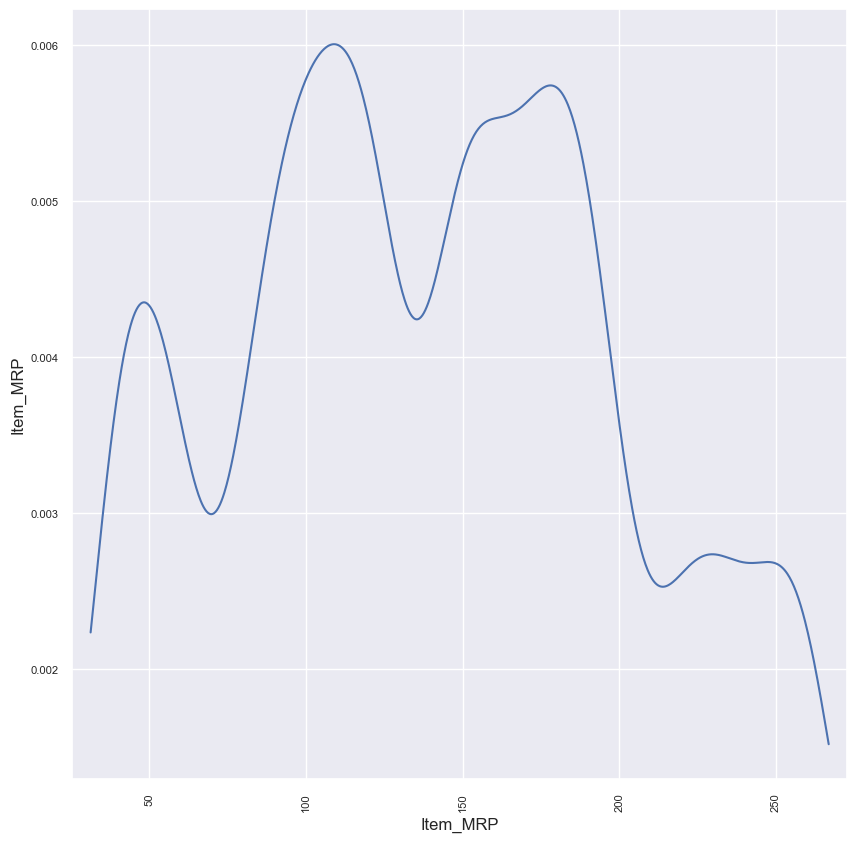

In [ ]:
pd.plotting.scatter_matrix(data[cols],diagonal='kde',figsize=(10,10))
plt.show()

In [ ]:
data_bk=data

### Datos atípicos

Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención; por ahora sólo voy a hacer un análisis rápido a través de la desviación estándar de la variable 'SalePrice' y a realizar un par de diagramas de dispersión.

In [ ]:
from sklearn.preprocessing import StandardScaler

outlet_sales_scaled = StandardScaler().fit_transform(data['Item_Outlet_Sales'][:,np.newaxis]);
low_range =outlet_sales_scaled[outlet_sales_scaled[:,0].argsort()][:10]
high_range = outlet_sales_scaled[outlet_sales_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-1.25879017]
 [-1.25879017]
 [-1.25839999]
 [-1.25800981]
 [-1.25761963]
 [-1.25683928]
 [-1.25683928]
 [-1.2564491 ]
 [-1.25605892]
 [-1.25605892]]

Fuera de la distribución (por arriba):
[[4.39333221]
 [4.45302948]
 [4.62470792]
 [4.72069177]
 [4.73239712]
 [4.76166049]
 [5.16432446]
 [5.42886533]
 [5.82294538]
 [6.39104493]]


C:\Users\ediso\AppData\Local\Temp\ipykernel_23548\2378598794.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  outlet_sales_scaled = StandardScaler().fit_transform(data['Item_Outlet_Sales'][:,np.newaxis]);


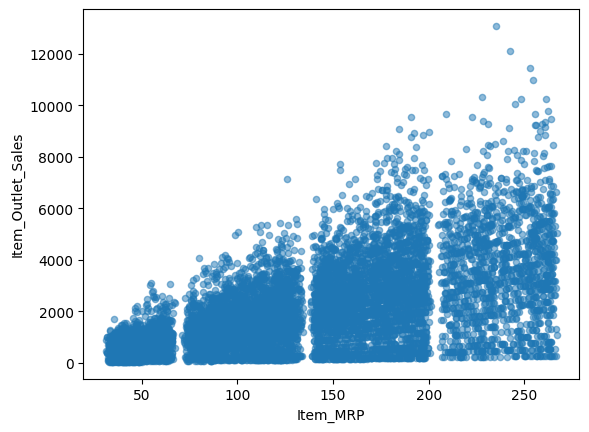

In [ ]:
var = 'Item_MRP'
data = pd.concat([target, data[var]], axis = 1)
data.plot.scatter(x = var, y = 'Item_Outlet_Sales', alpha = 0.5)
plt.show()

In [ ]:
data.sort_values(by = 'Item_MRP', ascending = False)[:2]

,Item_Outlet_Sales,Item_MRP
4802,1059.9536,266.8884
5884,5034.7796,266.8884


In [ ]:
df_train = data.drop(data[data.index == 4802].index)
df_train = data.drop(data[data.index == 5884].index)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    anomalies = []
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 3   # podemos cambiar este corte
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

In [ ]:
anomalos = find_anomalies(target)
print(anomalos)

-2938.2099336264673
7300.787760776531
[130, 145, 276, 304, 333, 373, 456, 472, 661, 694, 753, 809, 935, 991, 997, 1009, 1138, 1254, 1450, 1506, 1859, 1998, 2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154, 3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676, 4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500, 5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537, 6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302, 7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201, 8245, 8447]


In [ ]:
data.loc[anomalos]

,index,Item_Outlet_Sales,Item_MRP
130,130,7968.2944,180.5976
145,145,7370.4060,246.3802
276,276,7452.9652,256.4988
304,304,7696.6480,224.9720
333,333,9267.9360,230.9984
...,...,...,...
7930,7930,9227.9880,255.4330
8039,8039,8994.9580,258.0988
8201,8201,9390.4432,228.1352
8245,8245,7549.5062,260.3278


In [ ]:
anomalos = find_anomalies(data[['Item_MRP']])
print(anomalos)

-45.832417558394695
327.8179815147481
[]


In [ ]:
data.loc[anomalos].sort_values(by = 'Item_MRP', ascending = False).drop_duplicates()

,index,Item_Outlet_Sales,Item_MRP


In [ ]:
list_cuanti

['index', 'Item_Outlet_Sales', 'Item_MRP']

In [ ]:
for r in list_cuanti:
    Q1 = r.quantile(0.25)
    Q3 = r.quantile(0.75)
    IQR = Q3 - Q1
    print("Q1 = {}".format(Q1[0]))
    print("Q3 = {}".format(Q3[0]))
    print("IQR = {}".format(IQR[0]))
    Data_SO = r[~((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
    Data_CO = r[((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("Datos con outliers en el Precio = {}".format(Data_CO.shape[0]))
    print("Datos sin outliers en el Precio = {}".format(Data_SO.shape[0]))

AttributeError: 'str' object has no attribute 'quantile'

In [ ]:
X=data.drop('Item_Outlet_Sales',axis=1).copy()
y=data[['Item_Outlet_Sales']]
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 1 colum

In [ ]:
data_train,data_test=train_test_split(data,test_size=0.2,random_state=1)

In [ ]:
data_test.shape


(1705, 12)

In [ ]:
data_train.shape

(6818, 12)

In [ ]:
data_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1945,NCF18,18.35,LF,0.089345,Household,191.9504,OUT018,2009,Medium,Tier 3,Supermarket Type2,5369.0112
1720,NCF42,17.35,Low Fat,0.168065,Household,176.2712,OUT018,2009,Medium,Tier 3,Supermarket Type2,1230.3984
1954,FDM08,10.10,Regular,0.053887,Fruits and Vegetables,225.6088,OUT017,2007,NaN,Tier 2,Supermarket Type1,4250.4672
1919,FDQ34,10.85,Low Fat,0.162904,Snack Foods,104.9622,OUT018,2009,Medium,Tier 3,Supermarket Type2,1482.0708
2461,FDF44,7.17,Regular,0.059717,Fruits and Vegetables,130.9968,OUT035,2004,Small,Tier 2,Supermarket Type1,2348.9424


In [ ]:
data_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1070,NCY05,13.50,Low Fat,0.055102,Health and Hygiene,37.0874,OUT045,2002,NaN,Tier 2,Supermarket Type1,952.7598
6305,FDM02,12.50,Regular,0.074035,Canned,87.9198,OUT018,2009,Medium,Tier 3,Supermarket Type2,1133.8574
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
5562,FDM02,12.50,Regular,0.073735,Canned,87.1198,OUT046,1997,Small,Tier 1,Supermarket Type1,1657.1762
1410,FDL21,15.85,Regular,0.007140,Snack Foods,40.8480,OUT013,1987,High,Tier 3,Supermarket Type1,679.1160


In [ ]:
X_train=data_train.drop('Item_Outlet_Sales',axis=1)
y_train=data_train[['Item_Outlet_Sales']]

In [ ]:
X_test =data_test.drop('Item_Outlet_Sales',axis=1)
y_test=data[['Item_Outlet_Sales']]

In [ ]:
X_train.shape,y_train.shape

((6818, 11), (6818, 1))

In [ ]:
X_test.shape,y_test.shape

((1705, 11), (8523, 1))

In [ ]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5659.000000,6818.000000,6818.000000,6818.000000
mean,12.862008,0.066256,141.583528,1997.830595
std,4.653398,0.051477,61.944576,8.385614
min,4.555000,0.000000,31.290000,1985.000000
25%,8.730000,0.026950,94.719900,1987.000000
50%,12.600000,0.054229,143.215400,1999.000000
75%,16.850000,0.095374,185.901600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
model_multiple=LinearRegression()
model_multiple.fit(X_train,y_train)

ValueError: could not convert string to float: 'NCF18'

In [ ]:
data.drop('Item_Identifier',axis=1,inplace=True)
data.describe(include=object)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523
unique,2,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5517,1232,935,5203,3350,5577


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Weight        8523 non-null   float64
 1   Item_Fat_Content   8523 non-null   object 
 2   Item_Visibility    8523 non-null   float64
 3   Item_Type          8523 non-null   object 
 4   Item_MRP           8523 non-null   float64
 5   Outlet_ID          8523 non-null   object 
 6   Outlet_Year        8523 non-null   int64  
 7   Outlet_Size        8523 non-null   object 
 8   Location_Type      8523 non-null   object 
 9   Outlet_Type        8523 non-null   object 
 10  Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].round(0).astype(np.int64)

In [ ]:
d2=data.drop(columns=['Outlet_Year'])
df_dummies=pd.get_dummies(d2)
df_dummies.head(10)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 5   Item_Fat_Content_Regular         8523 non-null   uint8  
 6   Item_Type_Baking Goods           8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [ ]:
msk = np.random.rand(len(df_dummies)) < 0.8
train2 = df_dummies[msk]
test2 = df_dummies[~msk]

In [ ]:
X_train=train2.drop(columns='Item_Outlet_Sales')
y_train=train2[['Item_Outlet_Sales']]

X_test=train2.drop(columns='Item_Outlet_Sales')
y_test=train2[['Item_Outlet_Sales']]
display(y_train.info(),y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 0 to 8520
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Outlet_Sales  6777 non-null   float64
dtypes: float64(1)
memory usage: 105.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 0 to 8520
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Outlet_Sales  6777 non-null   float64
dtypes: float64(1)
memory usage: 105.9 KB


None

None

In [66]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

LinearRegression()

In [67]:
y_hat_train= regr.predict(train2.drop(columns = 'Item_Outlet_Sales'))
y_hat_test= regr.predict(test2.drop(columns = 'Item_Outlet_Sales'))

In [ ]:
pd.DataFrame(y_hat_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6827 entries, 0 to 6826
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6827 non-null   float64
dtypes: float64(1)
memory usage: 53.5 KB


In [ ]:
y_train.shape[0]

6845

In [68]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_train - y_train)))
print("Residual sum of squares: %.2f" % np.mean((y_hat_train - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('R2-score: %.2f' % regr.score(X_train, y_train))

Mean absolute error: 834.55
Residual sum of squares: 1261567.16
R2-score: 0.56


c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\ediso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
y_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6845 entries, 1 to 8522
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Item_Outlet_Sales  6845 non-null   int64
dtypes: int64(1)
memory usage: 107.0 KB


In [69]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_test - y_test)))
print("Residual sum of squares: %.2f" % np.mean((y_hat_test - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R2-score: %.2f' % regr.score(X_test, y_test))

ValueError: Unable to coerce to DataFrame, shape must be (6777, 1): given (1746, 1)

In [70]:
import statsmodels.api as sm           
import statsmodels.formula.api as smf  

M_R = sm.OLS(y_train,X_train).fit()
M_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     309.7
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:35:45   Log-Likelihood:                -57217.
No. Observations:                6777   AIC:                         1.145e+05
Df Residuals:                    6748   BIC:                         1.147e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -1.8924      3.264     -0.580      0.562      -8.291       4.506
Item_Visibility                  -270.3369    278.230     -0.972      0.331    -815.756     275.082
Item_MRP                           15.4310      0.221     69.917      0.000      14.998      15.864
Item_Fat_Content_Low Fat          -73.0655     22.217     -3.289      0.001    -116.619     -29.512
Item_Fat_Content_Regular          -16.3611     24.140     -0.678      0.498     -63.682      30.960
Item_Type_Baking Goods            -26.8681     50.507     -0.532      0.595    -125.879      72.142
Item_Type_Breads                   11.9807     75.922      0.158      0.875    -136.850     160.811
Item_Type_Breakfast               -23.1004    113.954     -0.203      0.839    -246.486     200.285
Item_Type_Canned                   -7.5425     50.229     -0.150      0.881    -106.006      90.921
Item_Type_Dairy                   -38.7692     49.260     -0.787      0.431    -135.334      57.796
Item_Type_Frozen Foods            -17.2852     44.633     -0.387      0.699    -104.780      70.210
Item_Type_Fruits and Vegetables    17.3012     39.352      0.440      0.660     -59.841      94.443
Item_Type_Hard Drinks             -44.4859     85.423     -0.521      0.603    -211.943     122.971
Item_Type_Health and Hygiene       22.7587     57.129      0.398      0.690     -89.232     134.749
Item_Type_Household               -35.2829     45.340     -0.778      0.436    -124.164      53.599
Item_Type_Meat                     -3.3248     61.864     -0.054      0.957    -124.597     117.948
Item_Type_Others                  -21.6470     93.286     -0.232      0.817    -204.518     161.224
Item_Type_Seafood                 208.0808    153.742      1.353      0.176     -93.301     509.463
Item_Type_Snack Foods             -39.8927     38.911     -1.025      0.305    -116.170      36.384
Item_Type_Soft Drinks             -67.3498     59.759     -1.127      0.260    -184.495      49.796
Item_Type_Starchy Foods           -23.9995    103.084     -0.233      0.816    -226.076     178.077
Outlet_ID_OUT010                 -693.0599     29.175    -23.756      0.000    -750.252    -635.868
Outlet_ID_OUT013                  -12.0678     15.672     -0.770      0.441     -42.789      18.653
Outlet_ID_OUT017                   13.7471     32.740      0.420      0.675     -50.435      77.929
Outlet_ID_OUT018                  -61.3392     18.554     -3.306      0.001     -97.711     -24.968
Outlet_ID_OUT019                 -387.1187     28.794    -13.444      0.000    -443.564    -330.673
Outlet_ID_OUT027                  790.2170     18.628     42.422      0.000     753.701     826.733
Outlet_ID_OUT035                  149.7110     26.144      5.726      0.000      98